#Importing Dataset

#Importing libraries

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\prath\Desktop\GayatriDakle PRoject\Fruits and Vegetable Recognition\archive (3)\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\prath\Desktop\GayatriDake PRoject\Fruits and Vegetable Recognition\archive (3)\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


#Building Model

In [9]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\prath\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [18]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [19]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=40)

Epoch 1/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 453ms/step - accuracy: 0.7712 - loss: 0.8023 - val_accuracy: 0.8411 - val_loss: 0.5394
Epoch 2/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 271ms/step - accuracy: 0.7612 - loss: 0.7988 - val_accuracy: 0.8408 - val_loss: 0.5227
Epoch 3/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 281ms/step - accuracy: 0.7594 - loss: 0.8180 - val_accuracy: 0.8456 - val_loss: 0.5258
Epoch 4/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 278ms/step - accuracy: 0.7429 - loss: 0.9228 - val_accuracy: 0.8555 - val_loss: 0.4919
Epoch 5/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 271ms/step - accuracy: 0.7928 - loss: 0.7088 - val_accuracy: 0.8491 - val_loss: 0.5216
Epoch 6/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 267ms/step - accuracy: 0.7771 - loss: 0.7400 - val_accuracy: 0.8713 - val_loss: 0.4405
Epoch 7/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - accuracy: 0.7935 - loss: 0.7026 - val_accuracy: 0.8809 - val_loss: 0.4019
Epoch 8/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 273ms/step - accuracy: 0.8181 - loss: 0.5966 - val_accu

##Evaluating Model

In [22]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 268ms/step - accuracy: 0.8063 - loss: 0.6321
Training accuracy: 0.8166934251785278


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8151 - loss: 0.6194
Validation accuracy: 0.8166934251785278


##Saving Model

In [24]:
cnn.save('trained_model.h5')

In [25]:
training_history.history #Return Dictionary of history

{'accuracy': [0.026645265519618988,
  0.03146067261695862,
  0.053290531039237976,
  0.0638844296336174,
  0.06484751403331757,
  0.0911717489361763,
  0.10593900829553604,
  0.15730337798595428,
  0.1759229600429535,
  0.20834670960903168,
  0.25746387243270874,
  0.31492775678634644,
  0.3547351658344269,
  0.40096306800842285,
  0.4616372287273407,
  0.4911717474460602,
  0.5078651905059814,
  0.5598716139793396,
  0.5948635339736938,
  0.5887640714645386,
  0.6359550356864929,
  0.6256821751594543,
  0.6603531241416931,
  0.6709470152854919,
  0.6857143044471741,
  0.6924558877944946,
  0.7235954999923706,
  0.7232744693756104,
  0.7226324081420898,
  0.7425361275672913,
  0.7399678826332092,
  0.7556982636451721],
 'loss': [7.067795753479004,
  3.5807666778564453,
  3.533273696899414,
  3.3942036628723145,
  3.306208372116089,
  3.2092700004577637,
  3.1472301483154297,
  3.0192742347717285,
  2.945136070251465,
  2.788125991821289,
  2.631091594696045,
  2.3759031295776367,
  2.2

In [26]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating Accuracy of Model Achieved on Validation set

In [28]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 81.66934251785278 %


#Accuracy Visualization

##Training Visualization

In [29]:
#training_history.history['accuracy']

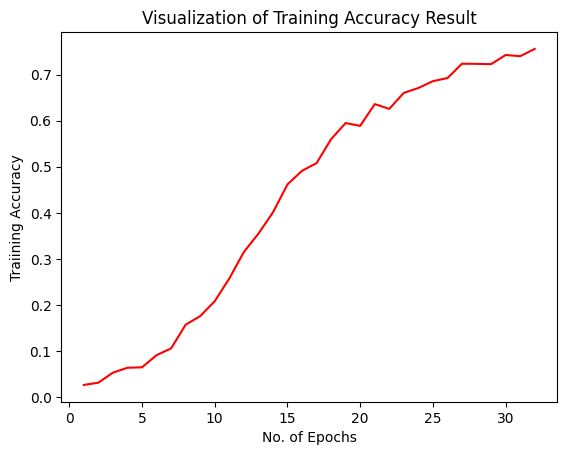

In [30]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

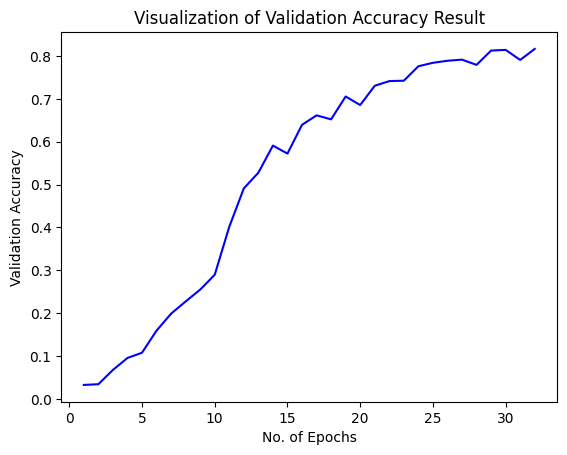

In [31]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\prath\Desktop\GayatriDakle PRoject\Fruits and Vegetable Recognition\archive (3)\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [35]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.8135 - loss: 0.7208
Test accuracy: 0.8272980451583862
